__Objective:__ <br>
I want to study the relationship between the bees populations and some climate parameters and make some predictions about the number of bees in the United States.

I didn't find an existing dataset with all the information I needed so I built one.

#### Context:

Honey bees and wild bees are the most important pollinators of many of the fruits and vegetables we eat. Of 100 crop species that provide 90% of our global food supply, 71 are bee-pollinated. <br>

It’s important to remember that the global food system is connected; the declining honey bee population is a problem that can and will eventually affect us all.

__Methodology:__ 


First, I search for the relevant data from public administration websites.<br>
I focus on 4 major climate parameters: Average Temperatures, CO2 emissions, Average Precipitation, the Palmer Drought Severity Index. <br>
I retrieve the data by downloading an existing dataset or by webscraping and loop through all the relevant pages

Then, I merged the different dataset that I got.<br>

After that, I applied some statistical models to highlight potential relationships between all these variables. <br>

Finally, I would like to apply some predictions models to determine the number of bees in the future in the United States. 

In [105]:
import pandas as pd
import numpy as np

<font color=blue>__DATA COLLECTION AND DATA CLEANING__</font>

### Information about the bees in the US by state

source : USDA - National Agricultural Statistics Service

In [2]:
bees_loss= pd.read_csv('/Users/sarahpierre-louis/Downloads/Bee Colony Survey Data by State.csv')

In [3]:
bees_loss.drop(['Week Ending', 'State ANSI','Watershed','CV (%)'], axis=1, inplace=True)

In [4]:
bees_loss.Period.value_counts()

MARKETING YEAR    1328
JAN THRU MAR       495
APR THRU JUN       493
OCT THRU DEC       315
JUL THRU SEP       315
FIRST OF JAN       135
FIRST OF APR       135
FIRST OF OCT        90
FIRST OF JUL        90
Name: Period, dtype: int64

In [5]:
bees_loss['Data Item'].value_counts()

INVENTORY                         1778
INVENTORY, MAX                     450
ADDED & REPLACED                   450
LOSS, DEADOUT                      450
LOSS, COLONY COLLAPSE DISORDER     268
Name: Data Item, dtype: int64

In [6]:
#Data cleaning
bees_loss.drop(bees_loss[bees_loss['Period'] == 'JAN THRU MAR' ].index , inplace=True)

In [7]:
bees_loss.drop(bees_loss[bees_loss['Period'] == 'OCT THRU DEC' ].index , inplace=True)
bees_loss.drop(bees_loss[bees_loss['Period'] == 'APR THRU JUN' ].index , inplace=True)
bees_loss.drop(bees_loss[bees_loss['Period'] == 'JUL THRU SEP' ].index , inplace=True)
bees_loss.drop(bees_loss[bees_loss['Period'] == 'FIRST OF JAN' ].index , inplace=True)
bees_loss.drop(bees_loss[bees_loss['Period'] == 'FIRST OF APR' ].index , inplace=True)
bees_loss.drop(bees_loss[bees_loss['Period'] == 'FIRST OF OCT' ].index , inplace=True)
bees_loss.drop(bees_loss[bees_loss['Period'] == 'FIRST OF JUL' ].index , inplace=True)


In [8]:
bees_loss.drop(bees_loss[bees_loss['Data Item'] == 'LOSS, DEADOUT' ].index , inplace=True)
bees_loss.drop(bees_loss[bees_loss['Data Item'] == 'INVENTORY, MAX' ].index , inplace=True)
bees_loss.drop(bees_loss[bees_loss['Data Item'] == 'ADDED & REPLACED' ].index , inplace=True)
bees_loss.drop(bees_loss[bees_loss['Data Item'] == 'LOSS, COLONY COLLAPSE DISORDER' ].index , inplace=True)

In [9]:
bees_loss.drop('Period', axis=1, inplace=True)

In [10]:
bees_loss.drop('Data Item', axis=1, inplace=True)

In [11]:
bees_loss.head()

,Year,State,Value
1618,2017,ALABAMA,"7,000"
1619,2017,ARIZONA,"22,000"
1620,2017,ARKANSAS,"29,000"
1621,2017,CALIFORNIA,"335,000"
1622,2017,COLORADO,"33,000"


In [154]:
bees_loss['State']=bees_loss['State'].apply(lambda x: str(x).title())

In [155]:
#Final dataframe ready to be merged
bees_loss.head()

,Year,State,Value
1618,2017,Alabama,"7,000"
1619,2017,Arizona,"22,000"
1620,2017,Arkansas,"29,000"
1621,2017,California,"335,000"
1622,2017,Colorado,"33,000"


In [163]:
bees_loss['Year'] = bees_loss['Year'].astype('object')
bees_loss['Year'].dtypes

dtype('O')

### Data about the CO2 Emission in the US by state

source: U.S. Energy Information Administration (EIA), State Energy Data System and EIA calculations 

In [15]:
CO2_emissions= pd.read_excel('/Users/sarahpierre-louis/Downloads/table1.xlsx')

In [16]:
CO2_emissions.columns = CO2_emissions.iloc[3]

In [17]:
CO2_emissions = CO2_emissions[4:54]
CO2_emissions.head()

3,State,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,Percent,Absolute
4,Alabama,142.24,133.63,138.49,139.36,141.66,143.33,145.78,147.43,139.63,120.10,132.77,129.93,123.20,120.91,123.16,120.14,115.09,-0.197028,-28.24
5,Alaska,44.40,43.50,43.65,43.73,46.86,48.22,45.93,44.23,39.64,38.00,38.92,38.79,38.24,36.18,35.34,36.23,34.91,-0.276027,-13.31
6,Arizona,86.07,88.43,87.76,89.61,96.61,96.68,99.92,101.88,102.25,93.40,95.31,93.38,91.36,95.19,93.17,90.95,87.01,-0.100021,-9.67
7,Arkansas,63.60,62.78,61.30,61.99,62.35,60.08,61.96,63.29,64.14,61.47,65.81,67.26,66.01,68.44,69.00,59.25,62.41,0.0387816,2.33
8,California,377.22,381.69,380.04,368.91,386.80,383.75,392.23,397.35,381.49,368.13,362.77,348.62,353.13,355.99,352.94,360.79,361.35,-0.0583713,-22.4


In [19]:
# pd.melt to transform the table to match the one about the bees with Year and State as columns
CO2em = pd.melt(CO2_emissions, id_vars=['State'], value_vars=CO2_emissions.columns[1:18])
CO2em.head()

,State,3,value
0,Alabama,2000,142.24
1,Alaska,2000,44.40
2,Arizona,2000,86.07
3,Arkansas,2000,63.60
4,California,2000,377.22


In [20]:
# Rename the columns
CO2em = CO2em.rename(columns={3: "Year", 'value':"Energy-related carbon dioxide emissions"})

In [21]:
CO2em = CO2em [['Year','State','Energy-related carbon dioxide emissions']]

We take only the data from 2006 to 2016

In [23]:
above_2006 =  CO2em['Year']>2005

In [24]:
CO2em = CO2em[above_2006]
CO2em['Year'] = CO2em['Year'].astype('object')
CO2em['Year'].dtypes

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


dtype('O')

In [25]:
CO2em.dtypes

Year                                        object
State                                       object
Energy-related carbon dioxide emissions    float64
dtype: object

In [26]:
CO2em.Year.unique()

array([2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0,
       2014.0, 2015.0, 2016.0], dtype=object)

In [27]:
# Clean the Year format

CO2em['Year'] = CO2em['Year'].astype(str).replace('\.0', '', regex=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
CO2em.Year.unique()

array(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'], dtype=object)

### Data about the temperatures in the US by state

sources : National Centers for Environmental Information - National Oceanic and Atmospheric Administration 

In [30]:
temperatures = pd.read_csv('/Users/sarahpierre-louis/Desktop/temperatures2.csv', sep=';')

In [33]:
temperatures

,Unnamed: 0,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Alabama,64.2,64.4,62.9,62.9,62.7,63.8,64.9,62.6,62.0,64.6,65.3
1,Alaska,26.4,28.1,25.1,26.8,27.4,27.0,24.3,27.8,30.3,30.0,31.9
2,Arizona,61.1,61.6,60.6,61.1,60.4,60.3,62.1,60.4,62.2,61.8,62.2
3,Arkansas,62.0,61.8,59.9,59.9,61.2,61.8,63.6,59.6,58.7,61.4,62.8
4,Californie,58.6,58.9,58.9,58.8,57.7,57.4,59.5,59.3,61.4,60.8,60.1
5,Colorado,46.5,46.2,44.9,45.2,46.2,45.4,48.3,45.1,46.1,47.4,47.3
6,Connecticut,51.1,49.5,49.7,48.8,51.4,50.9,52.5,49.8,48.7,49.8,51.8
7,Delaware,57.3,56.3,56.3,55.4,56.7,57.4,58.5,55.8,54.7,56.4,57.4
8,Florida,71.4,71.8,70.8,71.2,69.2,71.7,71.9,71.7,70.6,73.4,72.5
9,Georgia,64.5,64.8,63.5,63.4,63.0,64.6,65.5,63.4,63.0,65.3,65.8


In [35]:
#Change the columns name
temperatures.rename(columns={'Unnamed: 0': 'State', 'value':''}, inplace=True)

In [36]:
# pd.melt to transform the table to match the one about the bees with Year and State as columns

temperatures = pd.melt(temperatures, id_vars=['State'], value_vars=temperatures.columns[1:11])
temperatures = temperatures.rename(columns={'variable':'Year','value':"Average Temperature"})
temperatures.head()

,State,Year,Average Temperature
0,Alabama,2006,64.2
1,Alaska,2006,26.4
2,Arizona,2006,61.1
3,Arkansas,2006,62.0
4,Californie,2006,58.6


In [37]:
temperatures= temperatures[['Year','State','Average Temperature']]

In [38]:
#Final dataframe ready to be merged
temperatures.head()

,Year,State,Average Temperature
0,2006,Alabama,64.2
1,2006,Alaska,26.4
2,2006,Arizona,61.1
3,2006,Arkansas,62.0
4,2006,Californie,58.6


In [51]:
temperatures1['State'] = temperatures1.State.str.replace('Alabama ','Alabama')
temperatures1['State'] = temperatures1.State.str.replace('Californie','California')

In [52]:
temperatures1 = temperatures.sort_values(by='State')
temperatures1.columns

Index(['Year', 'State', 'Average Temperature'], dtype='object')

In [53]:
temperatures1.State.unique()

array(['Alabama ', 'Alaska', 'Arizona', 'Arkansas', 'Californie',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachussetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

### Data about the Average Precipitation in the US by state¶

I want to get information about the average precipitation in the US by state on the same period. <br>
The information are on the NCEI website with mutliple filter to choose the state, the period, the time scale. <br>
Each webpage corresponds to a state.<br>
The easiest way to retrieve the data is to web scrape the website by using BeautifulSoup and loop through all the pages.

sources : National Centers for Environmental Information - National Oceanic and Atmospheric Administration 

In [66]:
import json
import requests as r
import pandas as pd
from pandas.io.json import json_normalize

I scrape the data from the table on the page from the first state Alabama. 

In [67]:
url = "https://www.ncdc.noaa.gov/cag/statewide/time-series/1/pcp/12/12/2006-2016?base_prd=true&firstbaseyear=1925&lastbaseyear=2000&trend=true&trend_base=10&firsttrendyear=1925&lasttrendyear=2019"

In [68]:
response  = r.get(url)
html = r.get(url).content

In [70]:
from bs4 import BeautifulSoup

In [72]:
#select the table on the webpage
soup = BeautifulSoup(html)
table2= soup.select('table')

In [73]:
#select only the content that is relevant to my study
rows= table2[0].find_all('tr') 
rows = [row.text.strip().replace('\n\n','\n').split('\n') for row in rows]

In [75]:
#define the columns names as the first row
colnames= rows [0]
colnames

['Dates', 'Value', 'Rank', 'Departure From Mean (55.25")1901-2000 Base Period']

I manage to get the data from the page that I want for my study but I do not have the state in the dataframe. (I will tackle this issue later on.)

In [77]:
#define a dataframe with the data from the table

data = rows [1:]
data
df= pd.DataFrame(data, columns = colnames)
df.head()

,Dates,Value,Rank,"Departure From Mean (55.25"")1901-2000 Base Period"
0,200601 - 200612,"47.54""",4,"-7.71"""
1,200701 - 200712,"37.86""",1,"-17.39"""
2,200801 - 200812,"53.07""",6,"-2.18"""
3,200901 - 200912,"73.77""",11,"18.52"""
4,201001 - 201012,"47.19""",3,"-8.06"""


In [122]:
#I notice that there is no data on page 49, I get an error ('Invalid input') so I define a list with all the values from 1 to 51 without 49

df=pd.DataFrame()
import time

lst=[]
for i in range (1,51):
    if i!=49:
        lst.append(i)

When I check the url of all the pages, I notice that the only change is a number that represents the page number and that I have replaced by 'k' <br>
and that will take the values from 1 to 51 (but not 49).<br>
I loop through all the pages and add the data in a dataframe.

In [123]:
for k in lst:
    url = f'https://www.ncdc.noaa.gov/cag/statewide/time-series/{k}/pcp/12/12/2006-2016?base_prd=true&firstbaseyear=1925&lastbaseyear=2000&trend=true&trend_base=10&firsttrendyear=1925&lasttrendyear=2019'
    response= r.get(url)
    html = r.get(url).content 
    soup = BeautifulSoup(html)
    table2= soup.select('table')
    rows= table2[0].find_all('tr') 
    rows = [row.text.strip().replace('\n\n','\n').split('\n') for row in rows]
    colnames= rows [0]
    data = rows [1:]
    df=df.append(data)
    time.sleep(1)
df.head()

,0,1,2,3
0,200601 - 200612,"47.54""",4,"-7.71"""
1,200701 - 200712,"37.86""",1,"-17.39"""
2,200801 - 200812,"53.07""",6,"-2.18"""
3,200901 - 200912,"73.77""",11,"18.52"""
4,201001 - 201012,"47.19""",3,"-8.06"""


In [126]:
#Change the column names and edit some formatting

df = df.rename(columns={0:'Year',1:"Average Precipitation"})
df['Year'] = df['Year'] .str.replace('200601 - 200612', '2006')
df['Year'] = df['Year'] .str.replace('200701 - 200712', '2007')
df['Year'] = df['Year'] .str.replace('200801 - 200812', '2008')
df['Year'] = df['Year'] .str.replace('200901 - 200912', '2009')
df['Year'] = df['Year'] .str.replace('201001 - 201012', '2010')
df['Year'] = df['Year'] .str.replace('201101 - 201112', '2011')
df['Year'] = df['Year'] .str.replace('201201 - 201212', '2012')
df['Year'] = df['Year'] .str.replace('201301 - 201312', '2013')
df['Year'] = df['Year'] .str.replace('201401 - 201412', '2014')
df['Year'] = df['Year'] .str.replace('201501 - 201512', '2015')
df['Year'] = df['Year'] .str.replace('201601 - 201612', '2016')
df.drop([2,3], axis=1, inplace=True)

As I said before, the dataframe we get from scraping the NCEI website do not provide the state information (as it is not an information in the table but in one of the filter on the page). <br>
To get a complete dataframe that I will be able to merge with the other ones (Temperatures, Bees population), I created a list with all the states that I extended to get the state name for the correct number of rows and then I set this list as index. 

In [127]:
lst = ['Alabama','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachussetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada', 'New Hampshire',
'New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming','Alaska']

In [128]:
statelst = []

for i in lst:
    statelst.extend([i]*11)

In [130]:
s = pd.Series(statelst)
precipitation = df.set_index([s])

In [131]:
precipitation.head()

,Year,Average Precipitation
Alabama,2006,"47.54"""
Alabama,2007,"37.86"""
Alabama,2008,"53.07"""
Alabama,2009,"73.77"""
Alabama,2010,"47.19"""


In [132]:
precipitation['State'] = precipitation.index

In [133]:
precipitation.head()

,Year,Average Precipitation,State
Alabama,2006,"47.54""",Alabama
Alabama,2007,"37.86""",Alabama
Alabama,2008,"53.07""",Alabama
Alabama,2009,"73.77""",Alabama
Alabama,2010,"47.19""",Alabama


In [134]:
precipitation.index = np.arange(0, len(precipitation))

In [135]:
precipitation= precipitation[['Year','State','Average Precipitation']]

In [136]:
#Final dataframe ready to be merged
precipitation.head()

,Year,State,Average Precipitation
0,2006,Alabama,"47.54"""
1,2007,Alabama,"37.86"""
2,2008,Alabama,"53.07"""
3,2009,Alabama,"73.77"""
4,2010,Alabama,"47.19"""


### Data about the Palmer Drought Severity Index in the US by state

sources: National Centers for Environmental Information - National Oceanic and Atmospheric Administration 

The __Palmer Drought Severity Inde__ has been reasonably successful at quantifying long-term drought. As it uses temperature data and a physical water balance model, it can capture the basic effect of global warming on drought through changes in potential evapotranspiration.

I do the same as I did for the Average precipitation data.<br>
I webscrape and loop through all the pages.

In [101]:
df1=pd.DataFrame()
for k in range (1,49):
    url = f'https://www.ncdc.noaa.gov/cag/statewide/time-series/{k}/pdsi/1/12/2006-2016?base_prd=true&begbaseyear=1901&endbaseyear=2000&trend=true&trend_base=10&begtrendyear=1895&endtrendyear=2019'
    response= r.get(url)
    html = r.get(url).content 
    soup = BeautifulSoup(html)
    table2= soup.select('table')
    rows= table2[0].find_all('tr') 
    rows = [row.text.strip().replace('\n\n','\n').split('\n') for row in rows]
    colnames= rows [0]
    data = rows [1:]
    df1=df1.append(data)
    time.sleep(1)
df1.head()

,0,1,2,3
0,200612,-1.73,5,-1.62
1,200712,-4.37,1,-4.26
2,200812,1.07,8,1.18
3,200912,5.14,11,5.25
4,201012,-2.67,3,-2.56
5,201112,-2.13,4,-2.02
6,201212,0.82,7,0.93
7,201312,2.72,10,2.83
8,201412,-0.42,6,-0.31
9,201512,2.33,9,2.44


In [106]:
df1 = df1.rename(columns={0:'Year',1:"Palmer Drought Severity Index"})
df1['Year'] = df1['Year'] .str.replace('200612', '2006')
df1['Year'] = df1['Year'] .str.replace('200712', '2007')
df1['Year'] = df1['Year'] .str.replace('200812', '2008')
df1['Year'] = df1['Year'] .str.replace('200912', '2009')
df1['Year'] = df1['Year'] .str.replace('201012', '2010')
df1['Year'] = df1['Year'] .str.replace('201112', '2011')
df1['Year'] = df1['Year'] .str.replace('201212', '2012')
df1['Year'] = df1['Year'] .str.replace('201312', '2013')
df1['Year'] = df1['Year'] .str.replace('201412', '2014')
df1['Year'] = df1['Year'] .str.replace('201512', '2015')
df1['Year'] = df1['Year'] .str.replace('201612', '2016')
df1.drop([2,3], axis=1, inplace=True)


As for the Average Precipitation, the state is missing from the dataframe so I am created a list and added it as index in the Dataframe.

In [107]:
lst1 = ['Alabama','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Idaho','Illinois','Indiana','Iowa','Kansas'
,'Kentucky','Louisiana','Maine','Maryland','Massachussetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada', 'New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']

In [124]:
statelst = []

for i in lst1:
    statelst.extend([i]*11)

In [109]:
s = pd.Series(statelst)
palmer_index = df1.set_index([s])


In [110]:
palmer_index.head()

,Year,Palmer Drought Severity Index
Alabama,2006,-1.73
Alabama,2007,-4.37
Alabama,2008,1.07
Alabama,2009,5.14
Alabama,2010,-2.67


In [111]:
palmer_index['State'] = palmer_index.index

In [112]:
palmer_index.index = np.arange(0, len(palmer_index))

In [113]:
palmer_index.head()

,Year,Palmer Drought Severity Index,State
0,2006,-1.73,Alabama
1,2007,-4.37,Alabama
2,2008,1.07,Alabama
3,2009,5.14,Alabama
4,2010,-2.67,Alabama


In [114]:
palmer_index= palmer_index[['Year','State','Palmer Drought Severity Index']]

In [115]:
#Final Dataframe ready to be merged
palmer_index.head()

,Year,State,Palmer Drought Severity Index
0,2006,Alabama,-1.73
1,2007,Alabama,-4.37
2,2008,Alabama,1.07
3,2009,Alabama,5.14
4,2010,Alabama,-2.67


### Now that I have the data about the climate parameters and about the bees populations with the same format, I can merged them to get my final dataset

I merge the datasets on the Year and State columns

In [137]:
merged1 = pd.merge(precipitation,palmer_index,how='left', on=['Year','State'])
merged1.head()

,Year,State,Average Precipitation,Palmer Drought Severity Index
0,2006,Alabama,"47.54""",-1.73
1,2007,Alabama,"37.86""",-4.37
2,2008,Alabama,"53.07""",1.07
3,2009,Alabama,"73.77""",5.14
4,2010,Alabama,"47.19""",-2.67


In [138]:
merged2 = pd.merge(merged1,temperatures1, on=['Year','State'])
merged2.head()

,Year,State,Average Precipitation,Palmer Drought Severity Index,Average Temperature
0,2006,Arizona,"9.76""",-3.10,61.1
1,2007,Arizona,"10.99""",-3.13,61.6
2,2008,Arizona,"12.31""",-1.02,60.6
3,2009,Arizona,"7.03""",0.06,61.1
4,2010,Arizona,"13.91""",-0.73,60.4


In [150]:
merged3 = pd.merge(merged2,CO2em, on=['Year','State'], how='left')
merged3.head()

,Year,State,Average Precipitation,Palmer Drought Severity Index,Average Temperature,Energy-related carbon dioxide emissions
0,2006,Arizona,"9.76""",-3.10,61.1,99.92
1,2007,Arizona,"10.99""",-3.13,61.6,101.88
2,2008,Arizona,"12.31""",-1.02,60.6,102.25
3,2009,Arizona,"7.03""",0.06,61.1,93.40
4,2010,Arizona,"13.91""",-0.73,60.4,95.31


In [151]:
merged3.dtypes

Year                                        object
State                                       object
Average Precipitation                       object
Palmer Drought Severity Index               object
Average Temperature                        float64
Energy-related carbon dioxide emissions    float64
dtype: object

In [157]:
bees_loss['Year'] = bees_loss['Year'].astype(str)

In [158]:
merged4 = pd.merge(merged3,bees_loss, on=['Year','State'], how='left')
merged4.head()

,Year,State,Average Precipitation,Palmer Drought Severity Index,Average Temperature,Energy-related carbon dioxide emissions,Value
0,2006,Arizona,"9.76""",-3.10,61.1,99.92,"30,000"
1,2007,Arizona,"10.99""",-3.13,61.6,101.88,"30,000"
2,2008,Arizona,"12.31""",-1.02,60.6,102.25,"25,000"
3,2009,Arizona,"7.03""",0.06,61.1,93.40,"20,000"
4,2010,Arizona,"13.91""",-0.73,60.4,95.31,"24,000"


In [159]:
merged4.isna().sum()

Year                                        0
State                                       0
Average Precipitation                       0
Palmer Drought Severity Index              10
Average Temperature                         0
Energy-related carbon dioxide emissions    20
Value                                      90
dtype: int64

In [160]:
# we see some null values so we fill them with 0
merged5=merged4.fillna('0')

In [161]:
merged5.dtypes

Year                                        object
State                                       object
Average Precipitation                       object
Palmer Drought Severity Index               object
Average Temperature                        float64
Energy-related carbon dioxide emissions     object
Value                                       object
dtype: object

Transform each variable in his proper format

In [162]:
#define the Year variable as int
merged5.Year=merged5.Year.apply(int)

In [163]:
#define the Average precipitation variable as float
merged5['Average Precipitation']=merged5['Average Precipitation'].apply(lambda x: float(x[:-1]))

In [167]:
#define the Palmer Drought Severity Index variable as float
merged5['Palmer Drought Severity Index']=merged5['Palmer Drought Severity Index'].apply(float)

In [168]:
#change the format of the Value variable and change it as int
merged5.Value=merged5.Value.str.replace(',','').map(int)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [169]:
#define the Energy-related carbon dioxide emissions variable as float
merged5['Energy-related carbon dioxide emissions']=merged5['Energy-related carbon dioxide emissions'].map(float)

In [170]:
merged5.dtypes

Year                                         int64
State                                       object
Average Precipitation                      float64
Palmer Drought Severity Index              float64
Average Temperature                        float64
Energy-related carbon dioxide emissions    float64
Value                                        int64
dtype: object

### Final Dataset

In [196]:
merged5.head()

,Year,State,Average Precipitation,Palmer Drought Severity Index,Average Temperature,Energy-related carbon dioxide emissions,Value,time
0,2006,Arizona,9.76,-3.10,61.1,99.92,30000,1
1,2007,Arizona,10.99,-3.13,61.6,101.88,30000,2
2,2008,Arizona,12.31,-1.02,60.6,102.25,25000,3
3,2009,Arizona,7.03,0.06,61.1,93.40,20000,4
4,2010,Arizona,13.91,-0.73,60.4,95.31,24000,5


In [ ]:
merged5.to_excel("beesproject5.xlsx")

<font color=blue>__DATA MODELING__</font>

### Relationship between bees populations and the climate parameters

Now that I have my dataset, I want to identify the relationship between the bees populations and the climate parameters and understand the functional dependencies of the variables and thus be able to predict the bees populations. 

In [197]:
merged5.date = pd.to_datetime(merged5.Year, format='%Y')

In [198]:
merged5['time']=merged5.Year-2005
merged5.head()

,Year,State,Average Precipitation,Palmer Drought Severity Index,Average Temperature,Energy-related carbon dioxide emissions,Value,time
0,2006,Arizona,9.76,-3.10,61.1,99.92,30000,1
1,2007,Arizona,10.99,-3.13,61.6,101.88,30000,2
2,2008,Arizona,12.31,-1.02,60.6,102.25,25000,3
3,2009,Arizona,7.03,0.06,61.1,93.40,20000,4
4,2010,Arizona,13.91,-0.73,60.4,95.31,24000,5


### 1st Method

All of my variables are numerical except the States. <br>
First, I will use the one-hot encoding method to transform the State categorical variable. <br>
Then, I will apply a multiple Linar Regression Model.<br>
I will check the hypothesis to confirm or contradict my model<br>


### Multiple Linear Regression Model

In [199]:
merged6=pd.get_dummies(columns=['State'], data=merged5, drop_first=True)

In [200]:
merged6.head()

,Year,Average Precipitation,Palmer Drought Severity Index,Average Temperature,Energy-related carbon dioxide emissions,Value,time,State_Arizona,State_Arkansas,State_Colorado,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,2006,9.76,-3.10,61.1,99.92,30000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,10.99,-3.13,61.6,101.88,30000,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008,12.31,-1.02,60.6,102.25,25000,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009,7.03,0.06,61.1,93.40,20000,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,13.91,-0.73,60.4,95.31,24000,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
X, y=merged6.sort_values(by='Year').drop('Value',axis=1),merged6.sort_values(by='Year')['Value']

### Ordinary least squares

I use statsmodels library to perform statistical tests and hypothesis testing. <br>
I will check if my multiple linear regression model satisfies the OLS assumptions. <br>

In [202]:
import statsmodels.api as sm

In [203]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

The r-squared is 0.98, this means that our model only captures 98% of the variation in the data. Our model is probably overfitting.

In [204]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     631.3
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:05:07   Log-Likelihood:                -4849.0
No. Observations:                 460   AIC:                             9800.
Df Residuals:                     409   BIC:                         1.001e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Year                                      -11.1327      5.928     -1.878      0.061     -22.785       0.520
Average Precipitation                      16.2747    125.863      0.129      0.897    -231.145     263.695
Palmer Drought Severity Index             768.7891    306.571      2.508      0.013     166.138    1371.440
Average Temperature                       208.8123    352.541      0.592      0.554    -484.207     901.831
Energy-related carbon dioxide emissions   239.5676     64.268      3.728      0.000     113.231     365.905
time                                     1216.7304    181.640      6.699      0.000     859.667    1573.794
State_Arizona                            6677.7031   1.37e+04      0.487      0.626   -2.03e+04    3.36e+04
State_Arkansas                           1.121e+04   1.31e+04      0.856      0.392   -1.45e+04     3.7e+04
State_Colorado                           1.267e+04   9214.238      1.375      0.170   -5439.098    3.08e+04
State_Connecticut                       -4268.7104   9278.661     -0.460      0.646   -2.25e+04     1.4e+04
State_Delaware                             38.1823   1.12e+04      0.003      0.997   -2.19e+04     2.2e+04
State_Florida                             1.36e+05   2.15e+04      6.322      0.000    9.37e+04    1.78e+05
State_Georgia                            2.837e+04   1.64e+04      1.734      0.084   -3796.367    6.05e+04
State_Idaho                              9.577e+04   7476.549     12.810      0.000    8.11e+04     1.1e+05
State_Illinois                          -4.419e+04   1.65e+04     -2.675      0.008   -7.67e+04   -1.17e+04
State_Indiana                           -4.024e+04   1.55e+04     -2.589      0.010   -7.08e+04   -9686.772
State_Iowa                               1.361e+04   9363.283      1.454      0.147   -4792.934     3.2e+04
State_Kansas                            -4790.5330   1.12e+04     -0.427      0.669   -2.68e+04    1.72e+04
State_Kentucky                          -2.749e+04   1.37e+04     -2.013      0.045   -5.43e+04    -645.672
State_Louisiana                         -1.122e+04   1.96e+04     -0.574      0.567   -4.97e+04    2.72e+04
State_Maine                              7028.2093   7019.644      1.001      0.317   -6770.874    2.08e+04
State_Maryland                          -1.288e+04   1.12e+04     -1.147      0.252    -3.5e+04    9204.573
State_Massachussetts                     3841.0395   9092.290      0.422      0.673    -1.4e+04    2.17e+04
State_Michigan                           4.193e+04   1.17e+04      3.582      0.000    1.89e+04    6.49e+04
State_Minnesota                          1.095e+05   7875.357     13.906      0.000     9.4e+04    1.25e+05
State_Mississippi                        2047.8097   1.41e+

We drop the variable where the p-values is above 1.

In [205]:
X = X.drop(['State_Maryland','State_Montana','State_Utah','State_Wisconsin','State_Washington'], axis=1)

In [206]:
X = X.drop(['State_Idaho','State_Illinois', 'State_Tennessee', 'State_Kentucky', 'State_Indiana'], axis=1)

In [207]:
X = X.drop(['State_Oklahoma','State_Missouri','Palmer Drought Severity Index'], axis=1)

In [208]:
X = X.drop(['State_Oregon','State_Nebraska','time','State_Virginia','State_Michigan'], axis=1)

In [209]:
X=X.drop('Average Precipitation', axis=1)

In [210]:
X=X.drop('State_Ohio', axis=1)

In [211]:
X=X.drop('State_Pennsylvania', axis=1)

The r-squared and the adjusted r-squared are equal, and the value is 0.93. <br>
__My model fits perfectly.__

In [212]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              213.2
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                   2.39e-237
Time:                        10:05:10   Log-Likelihood:                         -5281.8
No. Observations:                 460   AIC:                                  1.062e+04
Df Residuals:                     430   BIC:                                  1.075e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Year                                       65.3187      5.868     11.131      0.000      53.785      76.853
Average Temperature                     -1575.7152    248.047     -6.352      0.000   -2063.250   -1088.180
Energy-related carbon dioxide emissions  -165.1677     25.510     -6.475      0.000    -215.307    -115.029
State_Arizona                            6350.9174   8441.007      0.752      0.452   -1.02e+04    2.29e+04
State_Arkansas                            559.8756   8596.329      0.065      0.948   -1.63e+04    1.75e+04
State_Colorado                          -1.379e+04   7922.274     -1.740      0.083   -2.94e+04    1784.503
State_Connecticut                       -4.613e+04   8133.886     -5.672      0.000   -6.21e+04   -3.01e+04
State_Delaware                          -4.009e+04   8627.532     -4.647      0.000    -5.7e+04   -2.31e+04
State_Florida                            2.108e+05   9441.114     22.332      0.000    1.92e+05    2.29e+05
State_Georgia                             5.98e+04   8561.475      6.985      0.000     4.3e+04    7.66e+04
State_Iowa                              -1.156e+04   7911.843     -1.462      0.145   -2.71e+04    3987.176
State_Kansas                            -2.369e+04   8130.867     -2.914      0.004   -3.97e+04   -7710.416
State_Louisiana                          4.884e+04   8921.929      5.474      0.000    3.13e+04    6.64e+04
State_Maine                             -5.459e+04   8269.631     -6.601      0.000   -7.08e+04   -3.83e+04
State_Massachussetts                    -5.394e+04   8384.490     -6.433      0.000   -7.04e+04   -3.75e+04
State_Minnesota                          7.551e+04   8090.326      9.333      0.000    5.96e+04    9.14e+04
State_Mississippi                       -3702.3404   8922.118     -0.415      0.678   -2.12e+04    1.38e+04
State_Nevada                            -4.158e+04   8152.336     -5.100      0.000   -5.76e+04   -2.56e+04
State_New Hampshire                     -5.862e+04   8232.037     -7.120      0.000   -7.48e+04   -4.24e+04
State_New Jersey                        -1.623e+04   7943.872     -2.043      0.042   -3.18e+04    -617.093
State_New Mexico                        -3.192e+04   8185.620     -3.899      0.000    -4.8e+04   -1.58e+04
State_New York                           2.289e+04   8119.603      2.819      0.005    6930.172    3.88e+04
State_North Carolina                    -3168.9706   8212.418     -0.386      0.700   -1.93e+04     1.3e+04
State_North Dakota                       3.953e+05   8171.496     48.371      0.000    3.79e+05    4.11e+05
State_Rhode Island                       -4.92e+04   8349.363     -5

### Model Evaluation Metrics

In [218]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error of the model is: ", mean_squared_error(y, predictions))
print("R2 score of the model is : ", r2_score(y, predictions))

Mean Squared Error of the model is:  550662549.1201744
R2 score of the model is :  0.9160173697339988


### Hypothesis testing

I check the multicollinearity by doing the VIF test

In [219]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [220]:
from statsmodels.tools.tools import add_constant

In [221]:
X=add_constant(X)
X.head()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Year,Average Temperature,Energy-related carbon dioxide emissions,State_Arizona,State_Arkansas,State_Colorado,State_Connecticut,State_Delaware,State_Florida,...,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Rhode Island,State_South Dakota,State_Texas,State_Vermont,State_West Virginia,State_Wyoming
0,1.0,2006,61.1,99.92,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,1.0,2006,54.7,59.59,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
200,1.0,2006,56.8,139.37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,1.0,2006,52.7,112.15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
390,1.0,2006,42.1,6.68,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


We can see that only one variable is above 5, we will remove it and check the model again

In [223]:
pd.Series([vif(X.values,i) for i in range(X.shape[1])], index=X.columns)

const                                      493670.920642
Year                                            1.007559
Average Temperature                             3.358306
Energy-related carbon dioxide emissions         5.275888
State_Arizona                                   1.183336
State_Arkansas                                  1.227536
State_Colorado                                  1.042293
State_Connecticut                               1.099203
State_Delaware                                  1.237096
State_Florida                                   1.480830
State_Georgia                                   1.217275
State_Iowa                                      1.039603
State_Kansas                                    1.098100
State_Louisiana                                 1.322312
State_Maine                                     1.136276
State_Massachussetts                            1.168488
State_Minnesota                                 1.086967
State_Mississippi              

In [400]:
X=X.drop('Energy-related carbon dioxide emissions', axis=1)

### The multiple linear regression model equation

In [435]:
from sklearn import linear_model

In [436]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [442]:
predictions = lm.predict(X)
predictions[:5]

array([-27000.76891959,  11143.83493736,   8909.78650028,  -5193.32624821,
        53831.30769412])

In [438]:
lm.score(X,y)

0.9362404999187982

In [439]:
lm.coef_

array([ 0.00000000e+00,  1.08121417e+02, -4.48219546e+03, -1.74953618e+02,
       -1.57444450e+05,  2.96233470e+04,  2.30346625e+04,  3.89552915e+05,
       -3.42196761e+04, -5.52357093e+04, -3.12227932e+04,  2.65150677e+05,
        9.22245073e+04, -2.60830933e+04, -1.81002777e+04,  9.05080020e+04,
       -8.69236843e+04, -6.66268454e+04,  4.24015613e+04,  2.78019610e+04,
       -4.79658959e+04,  2.09940898e+05, -8.74820125e+04, -5.71505965e+04])

In [440]:
lm.intercept_

69369.35521452918

### 2nd method

First, I cluster the variable using Kmeans to group the variable into homogneous clusters. <br>
Then, I apply the multiple Linear Regression Model. <br>
Finaaly, I compare the previous results I got with the new ones to choose the most relevant model.

### Clustering and Linear Regression

In [224]:
merged6.head()

,Year,Average Precipitation,Palmer Drought Severity Index,Average Temperature,Energy-related carbon dioxide emissions,Value,time,State_Arizona,State_Arkansas,State_Colorado,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,2006,9.76,-3.10,61.1,99.92,30000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,10.99,-3.13,61.6,101.88,30000,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008,12.31,-1.02,60.6,102.25,25000,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009,7.03,0.06,61.1,93.40,20000,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,13.91,-0.73,60.4,95.31,24000,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
bees_new = merged6[['Value','State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Idaho',
       'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
       'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachussetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_Ohio', 'State_Oklahoma',
       'State_Oregon', 'State_Pennsylvania', 'State_Tennessee', 'State_Texas',
       'State_Utah', 'State_Vermont', 'State_Virginia', 'State_Washington',
       'State_Wisconsin', 'State_Wyoming', 'Average Precipitation','Palmer Drought Severity Index','Average Temperature','Energy-related carbon dioxide emissions']]

KeyError: "['State_California', 'State_Alaska'] not in index"

In [226]:
bees_new.head()

NameError: name 'bees_new' is not defined

#### Finding the appropriate number of clusters using KElbowVisualizer

In [371]:
from sklearn.cluster import KMeans

In [372]:
from yellowbrick.cluster import KElbowVisualizer

In [373]:
model = KMeans()

I can't really see a clear elbow but I will choose 3 as number of clusters

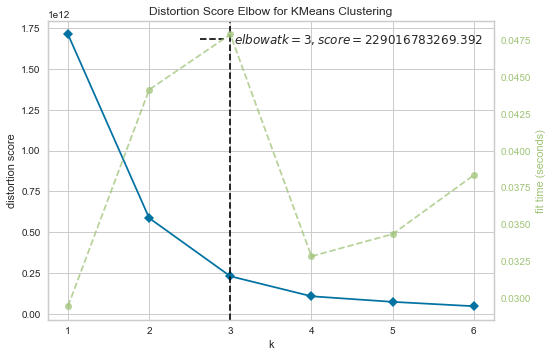

In [374]:
viz=KElbowVisualizer(model,k=(1,7)) 
viz.fit(bees_new) 
viz.poof()

#### Finding the appropriate number of clusters by using the Silhouette score

In [375]:
from sklearn import cluster
km3=cluster.KMeans(n_clusters=3)
km3.fit(bees_new)
y_k=km3.predict(bees_new)

In [376]:
from sklearn.metrics import silhouette_score

score = silhouette_score(bees_new, y_k, metric='euclidean')
score

0.699235836401225

In [377]:
from sklearn import cluster
km2=cluster.KMeans(n_clusters=2)
km2.fit(bees_new)
y_k=km2.predict(bees_new)

In [378]:
from sklearn.metrics import silhouette_score

score = silhouette_score(bees_new, y_k, metric='euclidean')
score

0.7730300248485481

In [379]:
from sklearn import cluster
km4=cluster.KMeans(n_clusters=4)
km4.fit(bees_new)
y_k=km4.predict(bees_new)

In [380]:
from sklearn.metrics import silhouette_score

score = silhouette_score(bees_new, y_k, metric='euclidean')
score

0.6837629307322707

The appropriate number of clusters using the silhouette score method is 2.

### Defining the Clusters with KMeans

In [381]:
model=KMeans(3)

In [382]:
bees_clustered = model.fit(bees_new)

In [383]:
bees_new['cluster_kmeans']=bees_clustered.fit_predict(bees_new)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [384]:
bees_new.cluster_kmeans.value_counts()

1    289
2     88
0     13
Name: cluster_kmeans, dtype: int64

In [385]:
from yellowbrick.cluster import InterclusterDistance

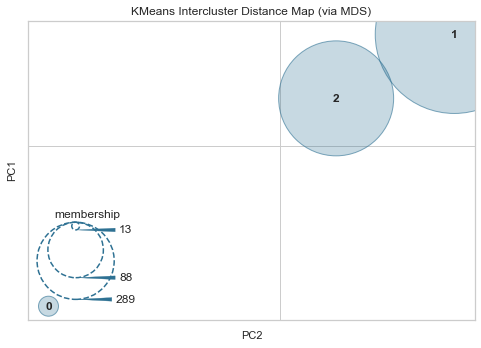

In [386]:
viz=InterclusterDistance(model)
viz.fit(bees_new.drop('cluster_kmeans', axis=1))
viz.poof()

In [387]:
bees_new.head()

,Value,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_Florida,State_Georgia,...,State_Vermont,State_Virginia,State_Washington,State_Wisconsin,State_Wyoming,Average Precipitation,Palmer Drought Severity Index,Average Temperature,Energy-related carbon dioxide emissions,cluster_kmeans
0,11000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,47.54,-1.73,64.2,145.78,1
1,11000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,37.86,-4.37,64.4,147.43,1
2,9000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,53.07,1.07,62.9,139.63,1
3,9000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,73.77,5.14,62.9,120.10,1
4,9000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,47.19,-2.67,62.7,132.77,1
5,9000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,50.71,-2.13,63.8,129.93,1
6,8000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,53.38,0.82,64.9,123.20,1
7,7000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,64.70,2.72,62.6,120.91,1
8,7000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,56.03,-0.42,62.0,123.16,1
9,7000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,61.36,2.33,64.6,120.14,1


#### One-hot encoding to specify in which cluster are each observation

In [388]:
merged7=pd.get_dummies(columns=['cluster_kmeans'], data=bees_new, drop_first=True)

In [389]:
merged7.head()

,Value,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_Florida,State_Georgia,...,State_Virginia,State_Washington,State_Wisconsin,State_Wyoming,Average Precipitation,Palmer Drought Severity Index,Average Temperature,Energy-related carbon dioxide emissions,cluster_kmeans_1,cluster_kmeans_2
0,11000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,47.54,-1.73,64.2,145.78,1,0
1,11000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,37.86,-4.37,64.4,147.43,1,0
2,9000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,53.07,1.07,62.9,139.63,1,0
3,9000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,73.77,5.14,62.9,120.10,1,0
4,9000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,47.19,-2.67,62.7,132.77,1,0
5,9000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,50.71,-2.13,63.8,129.93,1,0
6,8000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,53.38,0.82,64.9,123.20,1,0
7,7000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,64.70,2.72,62.6,120.91,1,0
8,7000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,56.03,-0.42,62.0,123.16,1,0
9,7000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,61.36,2.33,64.6,120.14,1,0


### Model after clustering

In [390]:
merged8= merged7[['Value','Average Precipitation', 'Palmer Drought Severity Index','Average Temperature','Energy-related carbon dioxide emissions','cluster_kmeans_1','cluster_kmeans_2']]

In [393]:
X, y=merged8.drop('Value',axis=1),merged8['Value']

In [402]:
model = sm.OLS(y, X).fit()

In [403]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [404]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.722
Method:                 Least Squares   F-statistic:                              204.0
Date:                Fri, 04 Oct 2019   Prob (F-statistic):                   7.69e-106
Time:                        13:41:20   Log-Likelihood:                         -4701.2
No. Observations:                 390   AIC:                                      9412.
Df Residuals:                     385   BIC:                                      9432.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Average Precipitation          -790.3420    181.480     -4.355      0.000   -1147.159    -433.525
Palmer Drought Severity Index  2210.8740    993.584      2.225      0.027     257.344    4164.404
Average Temperature            3724.8749    184.048     20.239      0.000    3363.009    4086.740
cluster_kmeans_1              -1.505e+05   8541.801    -17.617      0.000   -1.67e+05   -1.34e+05
cluster_kmeans_2              -6.609e+04   8937.739     -7.394      0.000   -8.37e+04   -4.85e+04
==============================================================================
Omnibus:                      108.644   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.668
Skew:                           1.301   Prob(JB):                     5.71e-68
Kurtosis:                       6.505   Cond. No.                         367.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Final Conclusion

We can say that the climate parameters I have chosen have a strong relationship with the bees populations. <br>
Temperature, Precipitation and CO2 emissions have a direct impact on the number of bees. <br>
It is inevitable to study climate change to understand the decline in bees populations <br>
y= 6939.35 + 1.98*averagetemp  + 0.36*averageprecip + ... + β18x18

### Upcoming Improvements 

- Take into consideration more climate parameters
- Take a longer time period. I took 10 years but it is not enough to really take into account a global climate change
- Get more data at a more detailed level: Months and County instead of Years and State
- Define a model to predict the number of bees in the future (Timeseries and Prophet)